In [92]:
import os
import sys
# Add src/ to sys.path (relative to current notebook)
sys.path.append(os.path.abspath("../../src"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

from utils.DataAnalysis import TableAnalysis, MyCustomException
from utils.VariableAnalysis import UnivariateAnalysis,BivariateAnalysis
from utils.pdf_file_save import PDFReportWriter
from utils.FeatureSelection import FeatureSelection

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [93]:
file_path = pathlib.Path('D:\Capstone Project\dataset\House_Price_dataset')
df = pd.read_csv(f"{file_path}/8.gurgaon_properties_missing_value_imputation.csv")
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,apna enclave,sector 3,8.0,6153.0,3.0,3.0,1,0.0,Old Property,13002.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,flat,la vida by tata housing,sector 113,2.0,11344.0,3.0,3.0,3,3.0,New Property,2599.0,1.0,1.0,0.0,0.0,0.0,1.0,174.0
2,flat,g l s arawali homes,sohna road,2.0,4513.0,2.0,2.0,2,1.0,Moderately Old,521.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,flat,tarc maceo,sector 91,9.0,5413.0,2.0,2.0,3+,8.0,Moderately Old,16627.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0
4,flat,bptp terra,sector 37d,1.0,7530.0,4.0,3.0,3+,6.0,Relatively New,2091.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0


In [94]:
df.shape

(3546, 18)

# ---------------- Feature Engineering Operation ---------------------------

In [95]:
## Column drop in 
train_df = df.drop(columns=['society','price_per_sqft'])
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 3,8.0,3.0,3.0,1,0.0,Old Property,13002.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,flat,sector 113,2.0,3.0,3.0,3,3.0,New Property,2599.0,1.0,1.0,0.0,0.0,0.0,1.0,174.0
2,flat,sohna road,2.0,2.0,2.0,2,1.0,Moderately Old,521.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,flat,sector 91,9.0,2.0,2.0,3+,8.0,Moderately Old,16627.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0
4,flat,sector 37d,1.0,4.0,3.0,3+,6.0,Relatively New,2091.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0


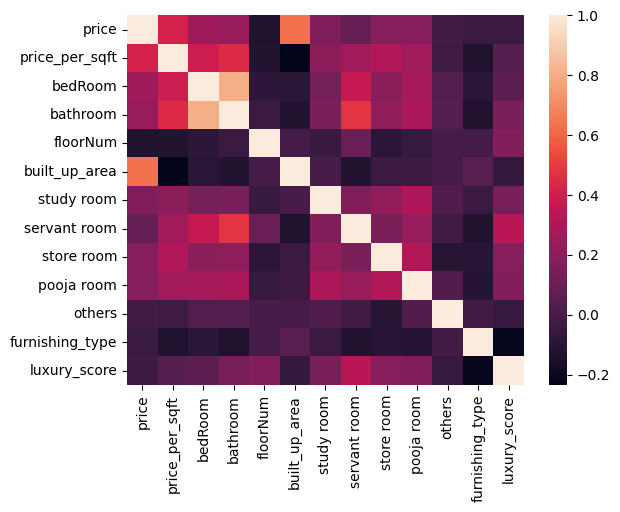

In [96]:
## Correlation between all numerical columns
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr())
plt.show()

In [97]:
## Correlation Price Vs all numerical Columns
numeric_df.corr()['price'].sort_values(ascending=False)

price              1.000000
built_up_area      0.631365
price_per_sqft     0.414669
bedRoom            0.250514
bathroom           0.237763
store room         0.183739
pooja room         0.182103
study room         0.162554
servant room       0.092735
others            -0.017224
luxury_score      -0.038290
furnishing_type   -0.042701
floorNum          -0.127019
Name: price, dtype: float64

In [98]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### luxury_score Deep Analysis

categorical_columns= ['property_type', 'sector', 'balcony', 'agePossession']
numerical_columns= ['price', 'bedRoom', 'bathroom', 'floorNum', 'built_up_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score']


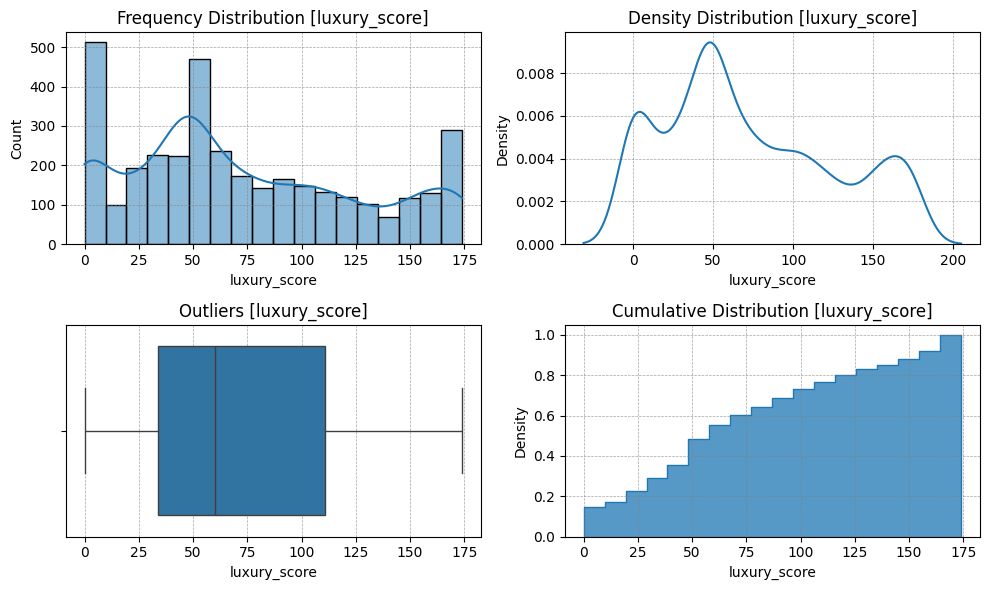

In [99]:
df_uni = UnivariateAnalysis(train_df)
print(df_uni)
a,b = df_uni.NumericalFeatureAnalysis('luxury_score')

### Adding luxury_category form [luxury_score Manual Binning (Rule-Based Binning)]

In [100]:
## Adding luxury_category column using Manual Binning 

def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [101]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 3,8.0,3.0,3.0,1,0.0,Old Property,13002.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Low
1,flat,sector 113,2.0,3.0,3.0,3,3.0,New Property,2599.0,1.0,1.0,0.0,0.0,0.0,1.0,174.0,High
2,flat,sohna road,2.0,2.0,2.0,2,1.0,Moderately Old,521.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Low
3,flat,sector 91,9.0,2.0,2.0,3+,8.0,Moderately Old,16627.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,Medium
4,flat,sector 37d,1.0,4.0,3.0,3+,6.0,Relatively New,2091.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0,Medium


categorical_columns= ['property_type', 'sector', 'balcony', 'agePossession', 'luxury_category']
numerical_columns= ['price', 'bedRoom', 'bathroom', 'floorNum', 'built_up_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score']


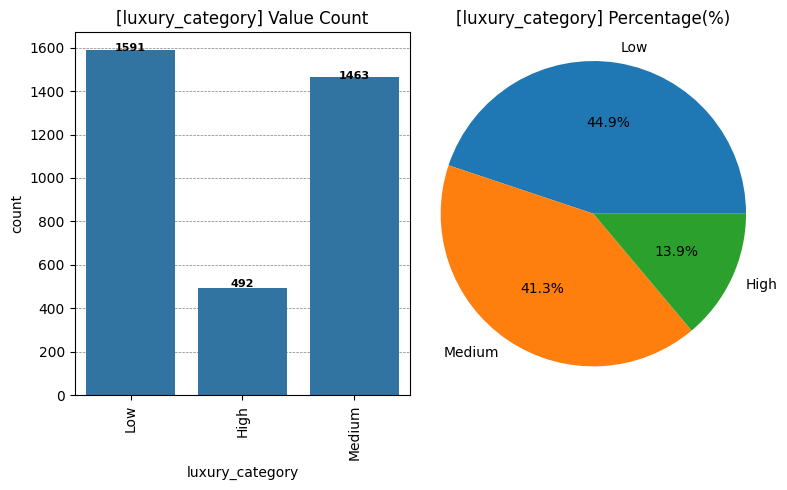

,field,luxury_category
0,non_null_count,3546
1,null_count,0
2,null%,0.0
3,dtype,object
4,unique_count,3
5,top_value,Low
6,top_count,1591
7,top_pct,44.87
8,top_3,"[Low, Medium, High]"
9,top_3_pct,"[44.87, 41.26, 13.87]"


In [102]:
### Data Visualization for luxury_category column 

df_uni = UnivariateAnalysis(train_df)
print(df_uni)
df_uni.CategoricalFeaturesAnalysis('luxury_category')

### Adding floor_category form [floorNum luxury_score Manual Binning (Rule-Based Binning)]

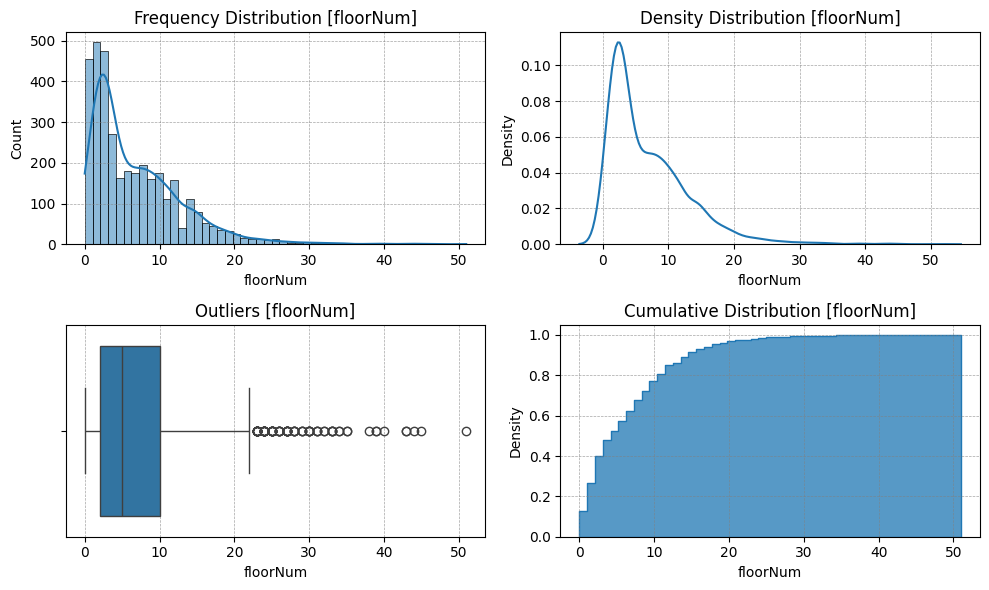

In [103]:
## Initial Observation 
df_uni = UnivariateAnalysis(train_df)
a,b = df_uni.NumericalFeatureAnalysis('floorNum')

In [104]:
## Adding floor_category column using Manual Binning 
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins
    
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 3,8.0,3.0,3.0,1,0.0,Old Property,13002.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Low,Low Floor
1,flat,sector 113,2.0,3.0,3.0,3,3.0,New Property,2599.0,1.0,1.0,0.0,0.0,0.0,1.0,174.0,High,Mid Floor
2,flat,sohna road,2.0,2.0,2.0,2,1.0,Moderately Old,521.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Low,Low Floor
3,flat,sector 91,9.0,2.0,2.0,3+,8.0,Moderately Old,16627.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,Medium,Mid Floor
4,flat,sector 37d,1.0,4.0,3.0,3+,6.0,Relatively New,2091.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0,Medium,Mid Floor


In [105]:
## Export dataframe pre categorical Tranformation

export_post_categorical_tran = train_df.copy()
export_post_categorical_tran.drop(columns=['pooja room', 'study room', 'luxury_score','floorNum','others'], inplace=True)
export_post_categorical_tran.to_csv(f"{file_path}/10.gurgaon_properties_post_feature_selection_v2.csv", index=False)


In [106]:
export_post_categorical_tran.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,flat,sector 3,8.0,3.0,3.0,1,Old Property,13002.0,0.0,0.0,1.0,Low,Low Floor
1,flat,sector 113,2.0,3.0,3.0,3,New Property,2599.0,1.0,0.0,1.0,High,Mid Floor
2,flat,sohna road,2.0,2.0,2.0,2,Moderately Old,521.0,0.0,0.0,1.0,Low,Low Floor
3,flat,sector 91,9.0,2.0,2.0,3+,Moderately Old,16627.0,0.0,0.0,1.0,Medium,Mid Floor
4,flat,sector 37d,1.0,4.0,3.0,3+,Relatively New,2091.0,0.0,0.0,0.0,Medium,Mid Floor


categorical_columns= ['property_type', 'sector', 'balcony', 'agePossession', 'luxury_category', 'floor_category']
numerical_columns= ['price', 'bedRoom', 'bathroom', 'floorNum', 'built_up_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score']


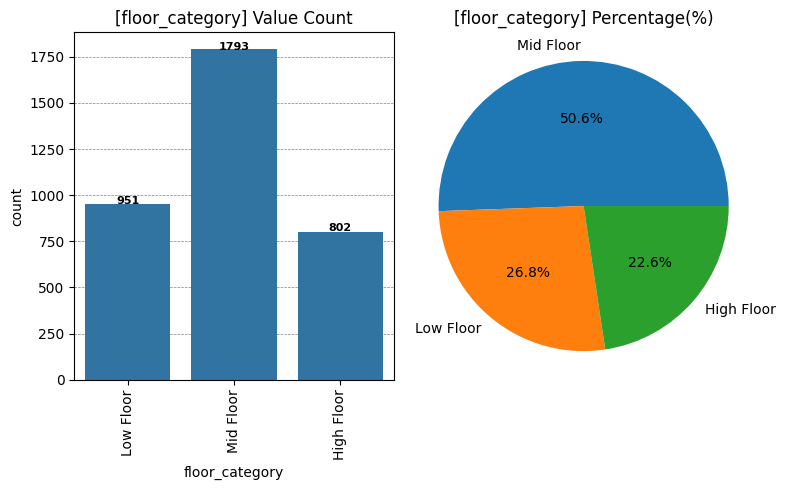

,field,floor_category
0,non_null_count,3546
1,null_count,0
2,null%,0.0
3,dtype,object
4,unique_count,3
5,top_value,Mid Floor
6,top_count,1793
7,top_pct,50.56
8,top_3,"[Mid Floor, Low Floor, High Floor]"
9,top_3_pct,"[50.56, 26.82, 22.62]"


In [107]:
### Data Visualization for luxury_category column 

df_uni = UnivariateAnalysis(train_df)
print(df_uni)
df_uni.CategoricalFeaturesAnalysis('floor_category')

In [108]:
## Column drop 'floorNum','luxury_score'
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)
train_df.head(2)

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 3,8.0,3.0,3.0,1,Old Property,13002.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,Low Floor
1,flat,sector 113,2.0,3.0,3.0,3,New Property,2599.0,1.0,1.0,0.0,0.0,0.0,1.0,High,Mid Floor


In [109]:
len(train_df.columns)

16

### Categorical Column Encoding

In [110]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

# Categorical Column filter
categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
   
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.feature_names_in_)
    print(f"{oe.categories_}\n")

['property_type']
[array(['flat', 'house'], dtype=object)]

['sector']
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 

In [111]:
# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

# ---------------------- Feature Selection Operation ---------------------

#### Technique 1 - Correlation Analysis

<Axes: >

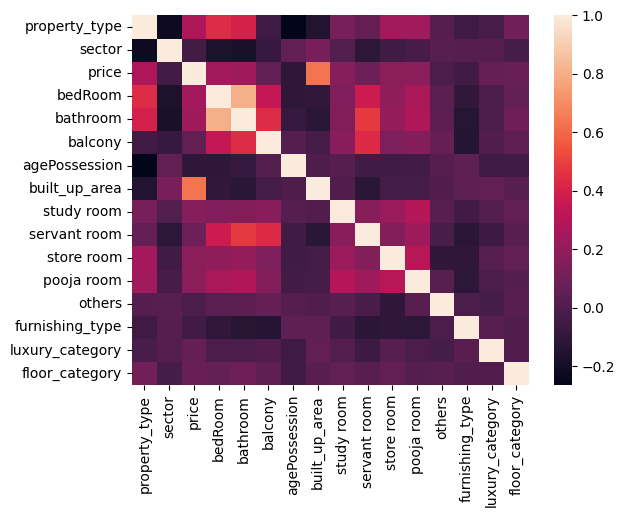

In [112]:
sns.heatmap(data_label_encoded.corr())

In [113]:
feature = FeatureSelection(data_label_encoded)

fi_df1_corr = feature.CorrFeatureSelection(dependent_col='price')
fi_df1_corr

,feature,corr_coeff
6,built_up_area,0.631365
0,property_type,0.277798
2,bedRoom,0.250514
3,bathroom,0.237763
9,store room,0.183739
10,pooja room,0.182103
7,study room,0.162554
8,servant room,0.092735
14,floor_category,0.073549
13,luxury_category,0.067679


#### Technique 2 - Random Forest Feature Importance

In [114]:
feature = FeatureSelection(data_label_encoded)
fi_df2_rfr = feature.RFRFeatureSelection(dependent_col='price')
fi_df2_rfr

,feature,rf_importance
6,built_up_area,0.697804
1,sector,0.084976
0,property_type,0.079924
2,bedRoom,0.032392
3,bathroom,0.019910
8,servant room,0.015083
5,agePossession,0.013816
4,balcony,0.012131
12,furnishing_type,0.008149
13,luxury_category,0.007590


### Technique 3 - Gradient Boosting Feature importances

In [115]:
feature = FeatureSelection(data_label_encoded)
fi_df3_gbr = feature.GBRFeatureSelection(dependent_col='price')
fi_df3_gbr

,feature,gb_importance
6,built_up_area,7.570474e-01
0,property_type,8.965154e-02
1,sector,6.116704e-02
2,bedRoom,4.024713e-02
8,servant room,2.122508e-02
3,bathroom,1.738873e-02
9,store room,6.116422e-03
7,study room,3.348622e-03
4,balcony,1.614480e-03
12,furnishing_type,1.071388e-03


### Technique 4 - Permutation Importance


In [116]:
feature = FeatureSelection(data_label_encoded)
fi_df4_pm = feature.PermutationFeatureSelection(dependent_col='price')
fi_df4_pm

,feature,permutation_importance
6,built_up_area,1.303874
0,property_type,0.243962
1,sector,0.120294
2,bedRoom,0.025396
3,bathroom,0.012805
8,servant room,0.009290
4,balcony,0.003543
13,luxury_category,0.003047
7,study room,0.002641
14,floor_category,0.001835


### Technique 5 - LASSO

In [117]:
feature = FeatureSelection(data_label_encoded)
fi_df5_lasso = feature.LassoFeatureSelection(dependent_col='price')
fi_df5_lasso

,feature,lasso_coeff
6,built_up_area,2.243563
0,property_type,0.852933
3,bathroom,0.337374
7,study room,0.227741
9,store room,0.212669
8,servant room,0.212276
2,bedRoom,0.189944
10,pooja room,0.119692
13,luxury_category,0.105356
14,floor_category,0.011388


### Technique 6 - RFE

In [118]:
feature = FeatureSelection(data_label_encoded)
fi_df6_rfe = feature.RecursiveFeatureElimination(dependent_col='price')
fi_df6_rfe

,feature,rfe_score
6,built_up_area,0.694576
1,sector,0.088806
0,property_type,0.082071
2,bedRoom,0.030181
3,bathroom,0.019174
8,servant room,0.017743
5,agePossession,0.013258
4,balcony,0.012679
12,furnishing_type,0.008640
13,luxury_category,0.007278


### Technique 7 - Linear Regression Weights

In [119]:
feature = FeatureSelection(data_label_encoded)
fi_df7_lin = feature.LinerRegressionFeature(dependent_col='price')
fi_df7_lin

,feature,reg_coeffs
6,built_up_area,2.256174
0,property_type,0.850610
3,bathroom,0.344606
7,study room,0.235733
8,servant room,0.224020
9,store room,0.216474
2,bedRoom,0.193716
10,pooja room,0.123668
13,luxury_category,0.115191
14,floor_category,0.020071


### Technique 8 - SHAP

In [120]:
feature = FeatureSelection(data_label_encoded)
fi_df8_shap = feature.ShapFeature(dependent_col='price')
fi_df8_shap

,feature,SHAP_score
6,built_up_area,2.075994
0,property_type,0.572033
1,sector,0.345093
2,bedRoom,0.125809
8,servant room,0.109691
3,bathroom,0.073154
4,balcony,0.048440
5,agePossession,0.039988
12,furnishing_type,0.039768
14,floor_category,0.031085


## All Feature Selection data frame merge

In [121]:
final_fi_df = fi_df1_corr.merge(fi_df2_rfr,on='feature').merge(fi_df3_gbr,on='feature').merge(fi_df4_pm,on='feature').merge(fi_df5_lasso,on='feature').merge(fi_df6_rfe,on='feature').merge(fi_df7_lin,on='feature').merge(fi_df8_shap,on='feature').set_index('feature')
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
built_up_area,0.631365,0.697804,7.570474e-01,1.303874,2.243563,0.694576,2.256174,2.075994
property_type,0.277798,0.079924,8.965154e-02,0.243962,0.852933,0.082071,0.850610,0.572033
bedRoom,0.250514,0.032392,4.024713e-02,0.025396,0.189944,0.030181,0.193716,0.125809
bathroom,0.237763,0.019910,1.738873e-02,0.012805,0.337374,0.019174,0.344606,0.073154
store room,0.183739,0.006619,6.116422e-03,-0.000776,0.212669,0.004909,0.216474,0.025739
pooja room,0.182103,0.005638,4.155214e-04,-0.003554,0.119692,0.004300,0.123668,0.014093
study room,0.162554,0.006685,3.348622e-03,0.002641,0.227741,0.006630,0.235733,0.023632
servant room,0.092735,0.015083,2.122508e-02,0.009290,0.212276,0.017743,0.224020,0.109691
floor_category,0.073549,0.006273,2.978756e-04,0.001835,0.011388,0.006582,0.020071,0.031085


In [122]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
built_up_area,0.314297,0.697804,7.570474e-01,0.763336,0.530804,0.694576,0.532546,0.583401
property_type,0.138289,0.079924,8.965154e-02,0.142824,0.201795,0.082071,0.200777,0.160754
bedRoom,0.124707,0.032392,4.024713e-02,0.014868,0.044939,0.030181,0.045724,0.035355
bathroom,0.118360,0.019910,1.738873e-02,0.007496,0.079819,0.019174,0.081341,0.020558
store room,0.091466,0.006619,6.116422e-03,-0.000454,0.050315,0.004909,0.051096,0.007233
pooja room,0.090652,0.005638,4.155214e-04,-0.002080,0.028318,0.004300,0.029191,0.003960
study room,0.080920,0.006685,3.348622e-03,0.001546,0.053881,0.006630,0.055642,0.006641
servant room,0.046164,0.015083,2.122508e-02,0.005439,0.050222,0.017743,0.052878,0.030826
floor_category,0.036613,0.006273,2.978756e-04,0.001074,0.002694,0.006582,0.004738,0.008736


In [123]:
## Calulation Mean for accross all Feature Importance Score Column
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)


feature
built_up_area      0.699233
property_type      0.111045
sector             0.080471
bedRoom            0.030608
servant room       0.018063
bathroom           0.016905
balcony            0.008422
agePossession      0.006784
furnishing_type    0.005014
study room         0.004970
store room         0.004885
luxury_category    0.004780
floor_category     0.004592
pooja room         0.002447
others             0.001781
dtype: float64

### Experiment Before Dropping Low Scored Columns 
- pooja room, study room, others

In [124]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,3.0,1.0,2.0,13002.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.0,19.0,3.0,3.0,3.0,1.0,2599.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
2,0.0,113.0,2.0,2.0,2.0,0.0,521.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.0,106.0,2.0,2.0,4.0,0.0,16627.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
4,0.0,46.0,4.0,3.0,4.0,3.0,2091.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,0.0,103.0,2.0,3.0,3.0,4.0,10262.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
3542,0.0,99.0,3.0,4.0,2.0,3.0,1900.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
3543,0.0,91.0,2.0,2.0,4.0,1.0,11620.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3544,0.0,108.0,3.0,4.0,2.0,3.0,1350.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [125]:
## Random Forest with All Columns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')
scores.mean()

np.float64(0.8237185339709476)

In [126]:
## Random Forest with Out 'pooja room', 'study room', 'others'
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')
scores.mean()

np.float64(0.8223812643589457)

In [127]:
## After Reviewing the score it is safe to Drop to columns=['pooja room', 'study room', 'others']
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [128]:
export_df.to_csv(f'{file_path}/9.gurgao_properties_post_feature_selection.csv', index=False)